In [2]:
import pandas

In [18]:
%pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 2.2 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
df = pandas.read_excel("Papollo-Healtcare-Dataset.xlsx")

In [4]:
df.head()

,Patient_ID,Admit_Date,Discharge_Date,Diagnosis,Bed_Occupancy,Test,Doctor,Followup Date,Feedback,Billing Amount,Health Insurance Amount
0,23571,2022-12-31,2023-01-12,Viral Infection,General,MRI,Jay Sinha,2023-01-20 00:00:00,5.0,13234,11910.6
1,27781,2023-01-04,2023-01-12,Typhoid,ICU,MRI,Jaya Yaadav,2023-01-16 00:00:00,4.0,12241,11016.9
2,24413,2023-01-05,2023-01-12,Malaria,General,CT Scan,Jay Sinha,2023-01-15 00:00:00,5.0,35255,31729.5
3,27360,2023-01-05,2023-01-12,Flu,Private,X-Ray,Jaya Yaadav,2023-01-19 00:00:00,5.0,6582,5923.8
4,26097,2023-01-06,2023-01-12,Viral Infection,General,Blood Test,Jaya Yaadav,2023-02-06 00:00:00,4.9,4567,4110.3


# Data Preprocessing

In [6]:
df.isnull().sum()

Patient_ID                 0
Admit_Date                 0
Discharge_Date             0
Diagnosis                  0
Bed_Occupancy              0
Test                       0
Doctor                     0
Followup Date              0
Feedback                   0
Billing Amount             0
Health Insurance Amount    0
dtype: int64

In [13]:
print("Different Medical Diagnosis Includes:")
print(df.Diagnosis.unique())
print('\n')
print("Different Medical Test Includes:")
print(df['Test'].unique())
print('\n')
print("Different Bed Occupency Type Includes:")
print(df['Bed_Occupancy'].unique())

Different Medical Diagnosis Includes:
['Viral Infection ' 'Typhoid' 'Malaria ' 'Flu' 'Pneumonia ' 'Fracture']


Different Medical Test Includes:
['MRI' 'CT Scan' 'X-Ray' 'Blood Test' 'Ultrasound']


Different Bed Occupency Type Includes:
['General' 'ICU' 'Private']


In [16]:
summary = {
    "Total Patients": df["Patient_ID"].nunique(),
    "Earliest Admission": df["Admit_Date"].min(),
    "Latest Discharge": df["Discharge_Date"].max(),
    "Most Common Diagnosis": df["Diagnosis"].mode()[0],
    "Most Common Test": df["Test"].mode()[0],
    "Average Billing Amount": df["Billing Amount"].mean(),
    "Average Insurance Coverage": df["Health Insurance Amount"].mean(),
    "Highest Bill": df["Billing Amount"].max(),
    "Lowest Bill": df["Billing Amount"].min(),
}
summary

{'Total Patients': 7157,
 'Earliest Admission': Timestamp('2022-12-05 00:00:00'),
 'Latest Discharge': Timestamp('2024-03-07 00:00:00'),
 'Most Common Diagnosis': 'Viral Infection ',
 'Most Common Test': 'Blood Test',
 'Average Billing Amount': 26607.891854128826,
 'Average Insurance Coverage': 23947.102668715943,
 'Highest Bill': 95867,
 'Lowest Bill': 1223}

## Some Key Insights from the Above Analysis

1. <b>Total Unique Patients:</b> 7,157
2. <b>Admission Period:</b> Dec 5, 2022 to March 7, 2024
3. <b>Most Common Diagnosis:</b> Viral Infection
4. <b>Most Common Test conducted:</b> Blood Test
5. <b>Billing & Insurance:</b>
   - Average Bill: ₹26,607
   - Average Insurance Coverage: ₹23,947
   - Highest Bill: ₹95,867
   - Lowest Bill: ₹1,223


## Explorative Data Analysis
The EDA includes: Understanding the data by plotting its variables

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

/var/folders/6z/0_vk6hj97qb5gkn3gq_k36ph0000gn/T/ipykernel_7288/4065092200.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(admit_trend.index.astype(str), rotation=45, ha="right")
/var/folders/6z/0_vk6hj97qb5gkn3gq_k36ph0000gn/T/ipykernel_7288/4065092200.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=diagnosis_counts.values, y=diagnosis_counts.index, ax=axes[1], palette="Blues_r")


Text(0.5, 1.0, 'Top 10 Diagnoses')

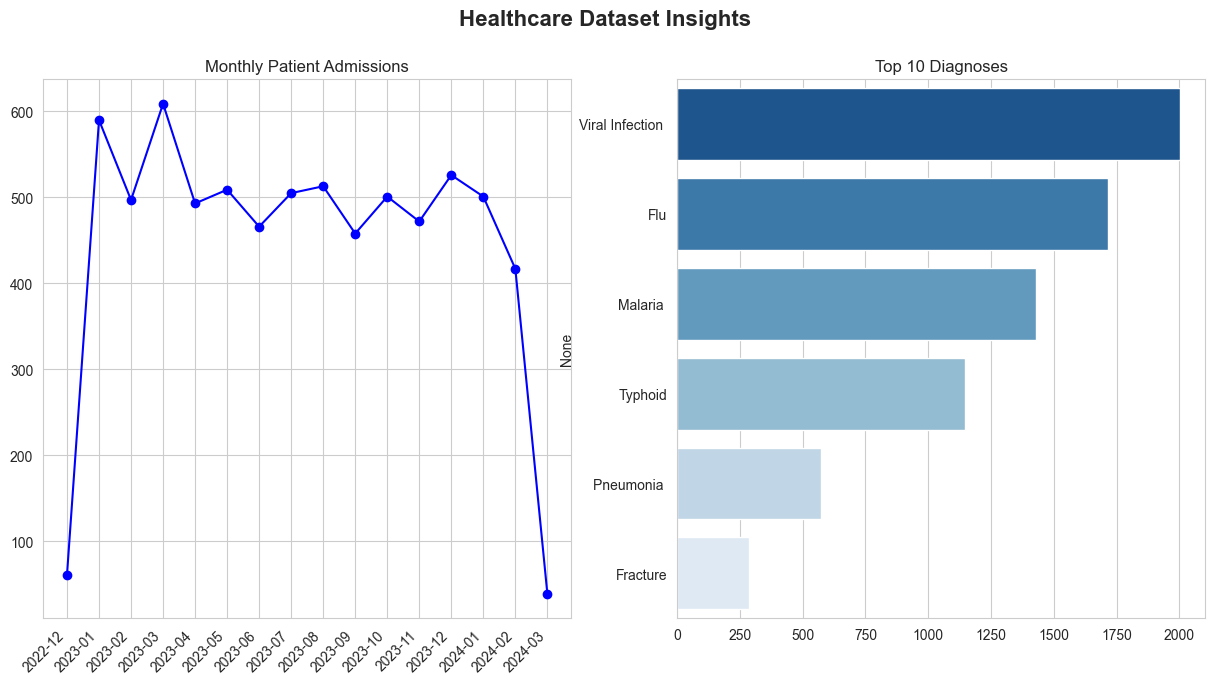

In [34]:
sns.set_style("whitegrid")

# Figure setup
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
fig.suptitle("Healthcare Dataset Insights", fontsize=16, fontweight="bold")

# 1. Admissions Over Time
admit_trend = df["Admit_Date"].dt.to_period("M").value_counts().sort_index()
axes[0].plot(admit_trend.index.astype(str), admit_trend.values, marker="o", linestyle="-", color="b")
axes[0].set_title("Monthly Patient Admissions")
axes[0].set_xticklabels(admit_trend.index.astype(str), rotation=45, ha="right")

# 2. Common Diagnoses
diagnosis_counts = df["Diagnosis"].value_counts().head(10)
sns.barplot(x=diagnosis_counts.values, y=diagnosis_counts.index, ax=axes[1], palette="Blues_r")
axes[1].set_title("Top 10 Diagnoses")


Text(0.5, 1.0, 'Billing Amount Distribution')

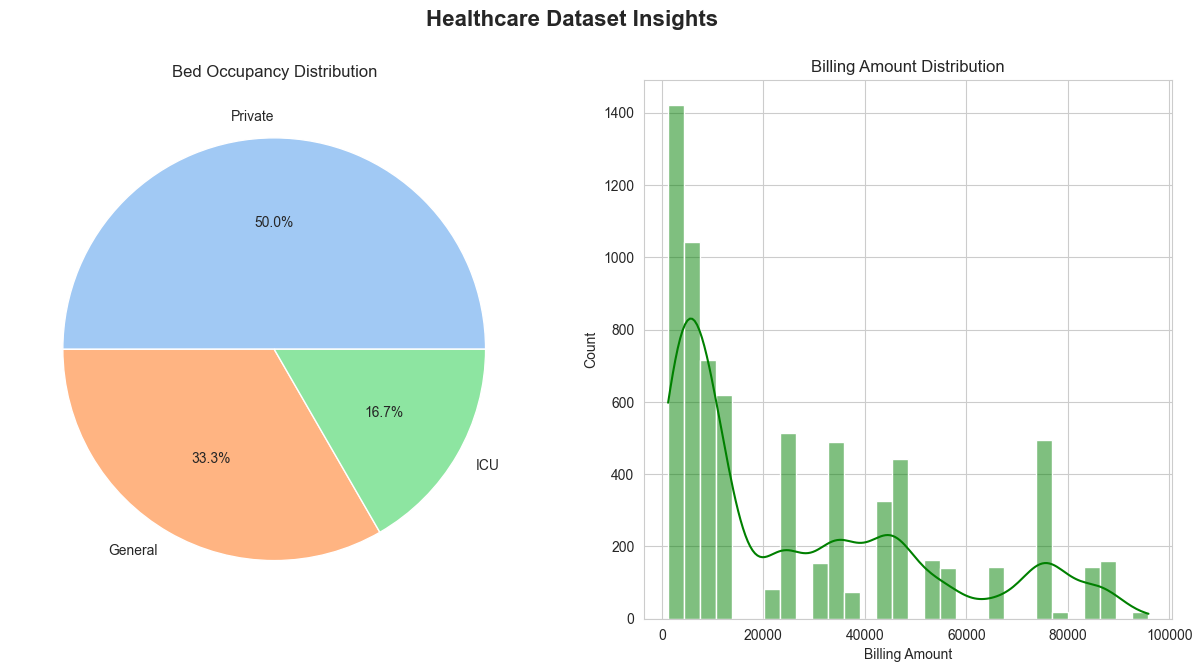

In [39]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
fig.suptitle("Healthcare Dataset Insights", fontsize=16, fontweight="bold")


# 3. Bed Occupancy Distribution
bed_counts = df["Bed_Occupancy"].value_counts()
axes[0].pie(bed_counts, labels=bed_counts.index, autopct="%1.1f%%", colors=sns.color_palette("pastel"))
axes[0].set_title("Bed Occupancy Distribution")

# 4. Billing Amount Distribution
sns.histplot(df["Billing Amount"], bins=30, kde=True, ax=axes[1], color="g")
axes[1].set_title("Billing Amount Distribution")

# Here are the insights from the Visualization:

1. <b>Monthly Patient Admissions:</b> The Insights Show that most Patient admission was in March 2023 and Least in March 2024
2. <b>Top 10 Diagnoses:</b> The Most common Diagnosis is Viral Infection followed by Common Flue.
3. <b>Bed Occupancy Distribution:</b> The Graph Shows Most Bed Occupency is of Private Beds.
4. <b>Billing Amount Distribution:</b> A histogram shows that most Bills is from range 0-20000

AttributeError: 'numpy.ndarray' object has no attribute 'set_xlabel'

/Users/adityakochar/Library/Python/3.9/lib/python/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 8377 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/adityakochar/Library/Python/3.9/lib/python/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 8377 missing from current font.
  font.set_text(s, 0, flags=flags)


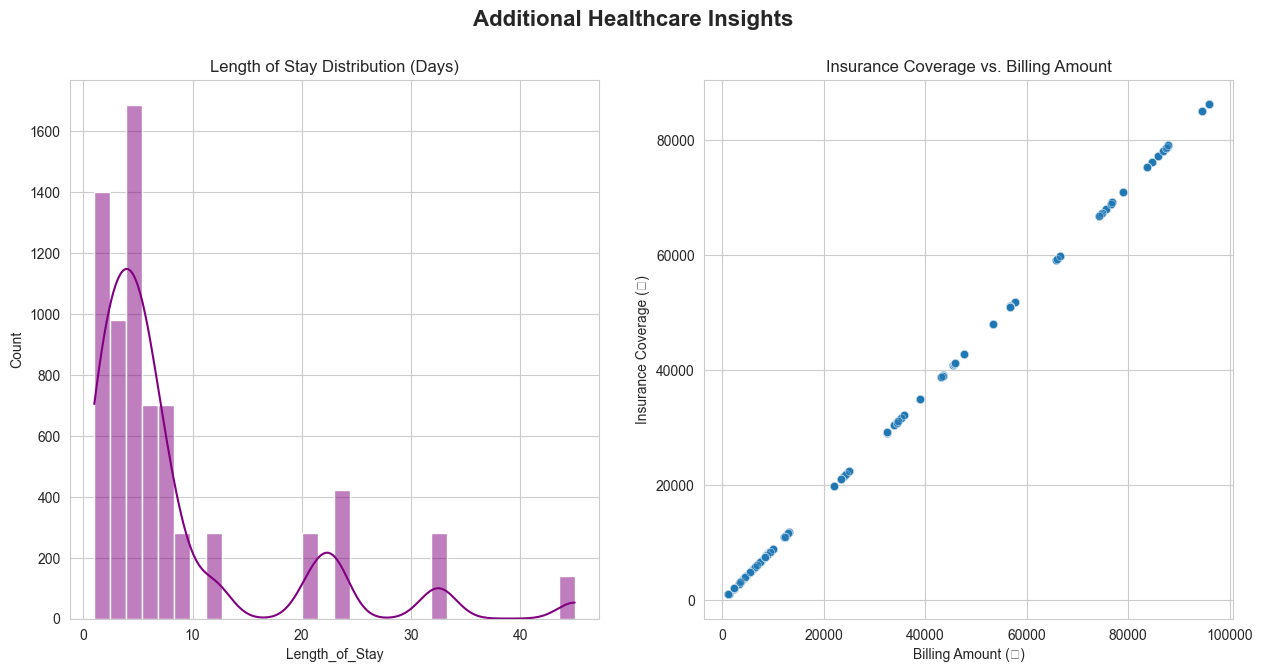

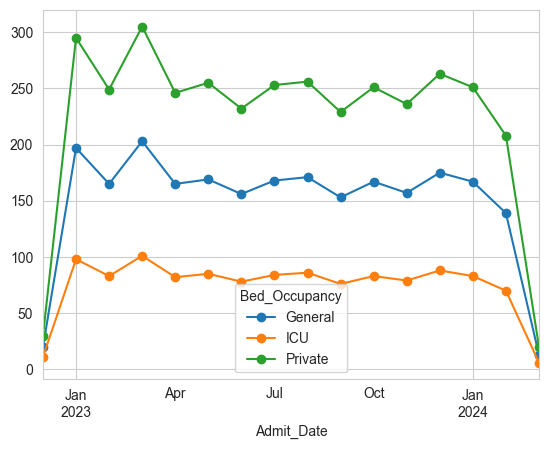

In [61]:
# Calculate Length of Stay (Discharge Date - Admit Date)
df["Length_of_Stay"] = (df["Discharge_Date"] - df["Admit_Date"]).dt.days

# Set up figure
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
fig.suptitle("Additional Healthcare Insights", fontsize=16, fontweight="bold")

# 1. Length of Stay Distribution
sns.histplot(df["Length_of_Stay"], bins=30, kde=True, ax=axes[0], color="purple")
axes[0].set_title("Length of Stay Distribution (Days)")

# 2. Insurance Coverage vs. Billing Amount
sns.scatterplot(x=df["Billing Amount"], y=df["Health Insurance Amount"], alpha=0.5, ax=axes[1])
axes[ 1].set_title("Insurance Coverage vs. Billing Amount")
axes[1].set_xlabel("Billing Amount (₹)")
axes[ 1].set_ylabel("Insurance Coverage (₹)")

bed_trend = df.groupby([df["Admit_Date"].dt.to_period("M"), "Bed_Occupancy"]).size().unstack()
bed_trend.plot(kind="line", marker="o")
axes.set_xlabel("Month")
axes.set_ylabel("Patient Count")

# Additional Insights from the Dataset:
1. <b>Length of Stay Distribution:</b> Most patients stay for a short duration, but some have extended hospitalizations.
2. <b>Insurance Coverage vs. Billing Amount:</b> A scatter plot showing the relationship between billed amounts and insurance coverage.
3. <b>Bed Occupancy Trends Over Time:</b> ICU, General, and Private bed usage trends over months.